<a href="https://colab.research.google.com/github/SheidaTalei/FinalProject/blob/main/SheidaTalei_BirchVsTFIDF_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUBJECT: Birch Vs TF-IDF
###AUTHOR: Sheida Talei

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD

In [3]:
#------------------------------------------Empty Rows Removal----------------------------------------------------------------
# This function Will: 1- Remove all empty rows from csv file 2- Save data to the same csv
def removeEmptyRows(fileName):
    df = pd.read_csv(fileName, encoding='utf-8-sig')
    df = df.dropna(subset=['text'], how='all', axis=0) 
    df.to_csv(fileName, header=True, encoding='utf-8-sig',  index=False)
    
    return df

In [4]:

X_and_Y = removeEmptyRows ('/content/drive/MyDrive/Final/train_temp.csv')
Y= X_and_Y.Label
X = X_and_Y.text

In [5]:
#--------------------------------------------------Loading StopWords ------------------------------------------
#Source of file: https://sites.google.com/site/kevinbouge/stopwords-lists
def getStopWord ():
    try:
        file = open('/content/drive/MyDrive/Final/stopwords_fa.txt', 'r', encoding='utf-8-sig')
        file_readed = file.read()
    
    finally:
        file.close()
        
    stopWord_Set = set(file_readed.split())
    return stopWord_Set


In [6]:
persian_stop_word = list(getStopWord())

In [7]:
vectorizer = TfidfVectorizer(stop_words= persian_stop_word ,  max_features = 2000 ) 
X_train_vector  = vectorizer.fit_transform(X)

In [8]:
svd = TruncatedSVD(n_components=512)
X_svd = svd.fit_transform(X_train_vector)

In [ ]:
#The branching_factor defines the number of sub-clusters and threshold sets the limit between the sample and sub-cluster.
#Balanced Iterative Reducing and Clustering using Hierarchies, or BIRCH for short, deals with large datasets by first generating a more compact summary that retains as 
#much distribution information as possible, and then clustering the data summary instead of the original dataset.
#Source: https://towardsdatascience.com/machine-learning-birch-clustering-algorithm-clearly-explained-fb9838cbeed9
k= 5
brc = Birch(branching_factor=5, n_clusters=k, threshold=0.01, compute_labels=True)
brc.fit(X_train_vector)


In [ ]:
clusters = brc.predict(X_train_vector)

In [ ]:
print ("Clusters: ")
print(clusters)

In [ ]:
labels = brc.labels_
print(labels)

In [ ]:
#source:https://ai.intelligentonlinetools.com/ml/tag/text-clustering/
# silhouette_score = metrics.silhouette_score(clusters, labels, metric='euclidean')

In [ ]:
# print ("Silhouette_score: ",silhouette_score )


100
500
800
1000
3000
6000
8000
10000
12000


Text(0, 0.5, 'Silhouette_score')

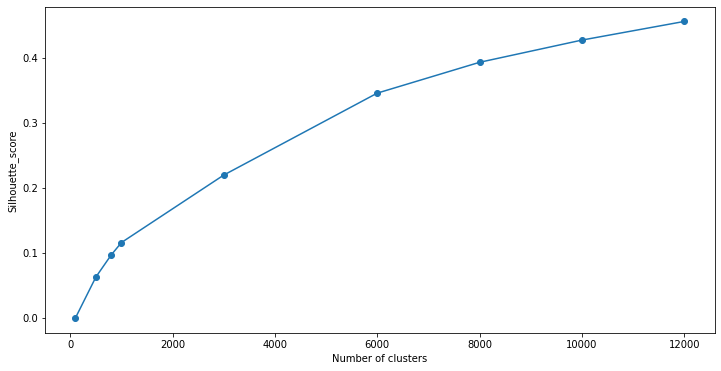

In [9]:
SSE = []
clusterList = [100,500,800,1000,3000,6000,8000,10000,12000]
for cluster in clusterList:
    brc = Birch(branching_factor=50, n_clusters=cluster, threshold=0.01, compute_labels=True)
    brc.fit(X_svd)
    labels = brc.labels_
    SSE.append(metrics.silhouette_score(X_svd, labels, metric='euclidean'))
    # clusterList.append(cluster)
    print (cluster)
    # cluster = cluster + 10

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':clusterList, 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_score')

In [ ]:
print (len(SSE))
clusterList = [10,50,80,100, 500,800,1000,3000,6000,10000,12000]
frame = pd.DataFrame({'Cluster':clusterList, 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_score')

19


ValueError: ignored